## Bcell marker genes Violin plot 

In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import anndata
import re
import h5py
import scipy.sparse as scs
import concurrent.futures
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
import seaborn as sns
from scipy.sparse import csc_matrix
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import umap
import random
import multiprocessing
random.seed(123)
from joblib import Parallel, delayed
import warnings
#warnings.filterwarnings('ignore')
import os
import gc
import math
from PIL import Image
from PIL import ImageDraw
import sc_toolbox as sct

/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fig_path = "/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/"
sc.settings.figdir = fig_path
sc.settings.autosave=False
sc.set_figure_params(vector_friendly=True, dpi_save=300)

In [3]:
subset_a_dc=sc.read("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/certpro/py_files/ALTRA_Certpro_Bcells_harmonized.h5ad")

/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [5]:
gene_names = subset_a_dc.raw.var_names
cell_annotations = subset_a_dc.obs

# Extract indices for the genes of interest
genes_of_interest = ['CD27', 'AIM2', 'IGHD', 'CD24']
indices = [i for i, gene in enumerate(gene_names) if gene in genes_of_interest] # gets the indices of the genes in adata

# Convert the sparse matrix to a dense matrix 
dense_matrix = subset_a_dc.raw.X.toarray()

# Extract the data for the specified genes
data = dense_matrix[:, indices]

# DataFrame for gene expression
df1 = pd.DataFrame(data, columns=[gene_names[i] for i in indices], index=subset_a_dc.obs_names)

df1 = df1.join(cell_annotations[['AIFI_L3']])
df1.head()

,AIM2,CD24,CD27,IGHD,AIFI_L3
9291,1.149780,0.000000,0.000000,1.149780,CD27+ effector B cell
9292,0.781604,1.214898,1.516209,0.000000,CD27+ effector B cell
9293,1.320318,0.000000,0.000000,0.000000,CD27+ effector B cell
9294,0.000000,0.000000,0.000000,2.711188,CD27+ effector B cell
9295,0.952372,0.000000,0.952372,1.997065,CD27+ effector B cell


In [6]:
df1 = df1.set_index('AIFI_L3').stack().reset_index()
df1.columns = ['AIFI_L3', 'gene', 'value']
df1

,AIFI_L3,gene,value
0,CD27+ effector B cell,AIM2,1.149780
1,CD27+ effector B cell,CD24,0.000000
2,CD27+ effector B cell,CD27,0.000000
3,CD27+ effector B cell,IGHD,1.149780
4,CD27+ effector B cell,AIM2,0.781604
...,...,...,...
757363,Core naive B cell,IGHD,1.638375
757364,Core naive B cell,AIM2,0.000000
757365,Core naive B cell,CD24,0.000000
757366,Core naive B cell,CD27,0.000000


In [7]:
df1_CD27 = df1[df1['gene'] == 'CD27']
df1_AIM2 = df1[df1['gene'] == 'AIM2']
df1_IGHD = df1[df1['gene'] == 'IGHD']
df1_CD24 = df1[df1['gene'] == 'CD24']

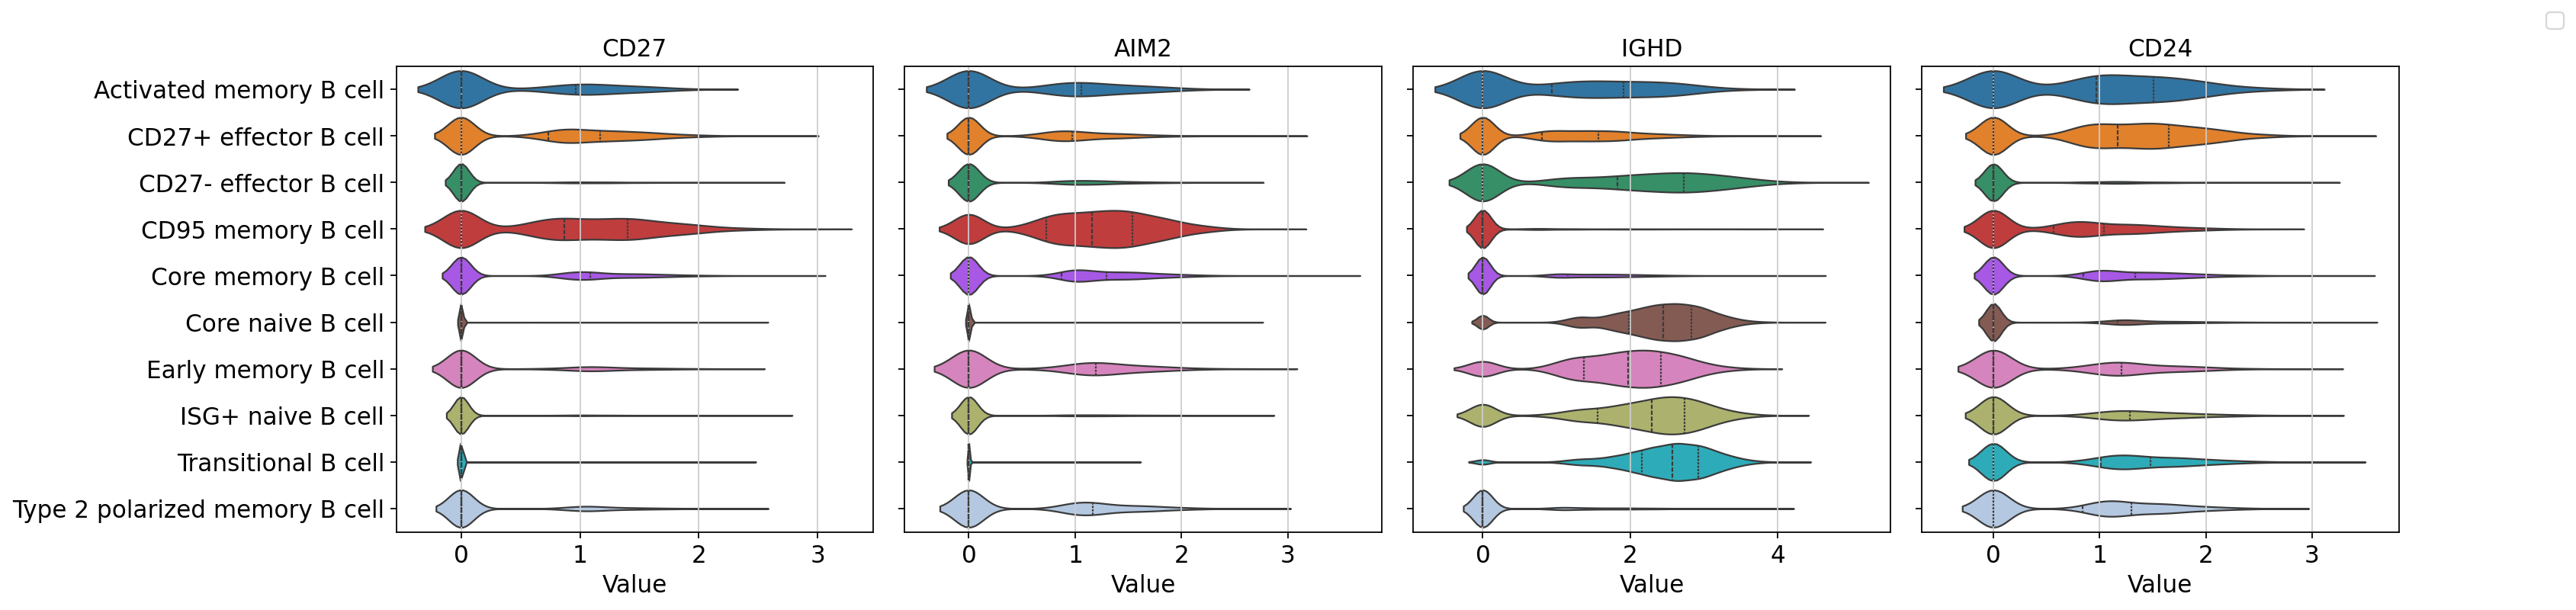

In [10]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Dictionary to map gene names to their corresponding DataFrames
gene_to_df = {
    'CD27': df1_CD27,
    'AIM2': df1_AIM2,
    'IGHD': df1_IGHD,
    'CD24': df1_CD24
}

# Loop through each gene and create a violin plot
for ax, gene in zip(axes, gene_to_df.keys()):
    subset_df = gene_to_df[gene]
    sns.violinplot(data=subset_df, x='value', y='AIFI_L3', hue='AIFI_L3', split=False, inner='quart', linewidth=1, ax=ax)
    ax.set_title(gene)
    ax.set_xlabel('Value')
    ax.set_ylabel('')  # Remove y-axis label to avoid clutter
    if ax != axes[0] and ax.get_legend() is not None:
        ax.get_legend().remove()  # Remove legend from all but the first plot

# Adjust layout
plt.tight_layout()

# Create a single legend outside the plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.savefig('Fig_S4G.pdf', bbox_inches='tight')
# Show the plot
plt.show()